In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.models import Model

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
model = tf.keras.models.load_model('../input/no-obs-2/no_obs')

In [3]:
img_height, img_width = 200, 200
data_dir = '../input/no-obs-diffs/no_obs_diffs'
batch_size = 32

In [4]:
datagen = ImageDataGenerator(
    validation_split=0.3,
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    color_mode='grayscale',
    batch_size=batch_size,
    shuffle=False,
    class_mode='binary',
    subset='validation')

Found 5338 images belonging to 2 classes.


In [5]:
n_val_images = 5338

In [6]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('No Obstacles Detected (True Negatives): ', cm[0][0])
  print('No Obstacles Incorrectly Detected (False Positives): ', cm[0][1])
  print('Obstacles Missed (False Negatives): ', cm[1][0])
  print('Obstacles Detected (True Positives): ', cm[1][1])
  print('Total Obstacles: ', np.sum(cm[1]))

In [7]:
metrics = model.evaluate_generator(
    val_generator,
    verbose=1)

167/167 [==============================] - 54s 323ms/step - loss: 1.0211 - tp: 2078.0000 - fp: 353.0000 - tn: 2438.0000 - fn: 469.0000 - accuracy: 0.8460 - precision: 0.8548 - recall: 0.8159 - auc: 0.9393


In [8]:
for name, value in zip(model.metrics_names, metrics):
  print(name, ': ', value)
print()


loss :  1.0210968255996704
tp :  2078.0
fp :  353.0
tn :  2438.0
fn :  469.0
accuracy :  0.8460097312927246
precision :  0.8547922372817993
recall :  0.8158618211746216
auc :  0.9393314719200134



In [9]:
labels = np.array([0] * (n_val_images//2) + [1] * (n_val_images//2))

In [10]:
predictions = model.predict_generator(val_generator, 167, verbose=1)

167/167 [==============================] - 48s 288ms/step


In [11]:
predictions

array([[0.08250988],
       [0.03426743],
       [0.11578953],
       ...,
       [0.44636533],
       [0.99671745],
       [0.9518802 ]], dtype=float32)

No Obstacles Detected (True Negatives):  2321
No Obstacles Incorrectly Detected (False Positives):  348
Obstacles Missed (False Negatives):  572
Obstacles Detected (True Positives):  2097
Total Obstacles:  2669
No Obstacles Detected (True Negatives):  2204
No Obstacles Incorrectly Detected (False Positives):  465
Obstacles Missed (False Negatives):  357
Obstacles Detected (True Positives):  2312
Total Obstacles:  2669
No Obstacles Detected (True Negatives):  2465
No Obstacles Incorrectly Detected (False Positives):  204
Obstacles Missed (False Negatives):  831
Obstacles Detected (True Positives):  1838
Total Obstacles:  2669


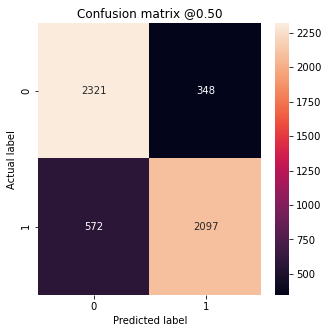

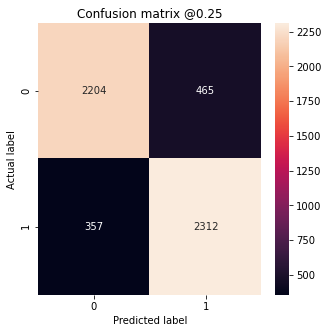

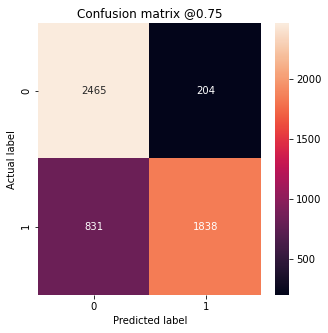

In [12]:
plot_cm(labels, predictions) # Default: threshold = 0.5
plot_cm(labels, predictions, p=0.25)
plot_cm(labels, predictions, p=0.75)